# Pandas

Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python.

Library documentation: <a>http://pandas.pydata.org/</a>

### General

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1
Create dataframe (that we will be importing)

In [2]:
 data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [3]:
df = pd.DataFrame(data = data, columns=['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


## Task 2

- Save dataframe as csv
- Load a csv
- Load a csv with no headers
- Load a csv while specifying column names
- Load a csv while skipping the top 3 rows

In [4]:
df.to_csv('./df.csv', index=False, header=False)

In [5]:
df = pd.read_csv('./df.csv', names=['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [6]:
df = pd.read_csv('./df.csv', header=None)
df

,0,1,2,3,4
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [7]:
df = pd.read_csv('./df.csv', header=None, usecols=[0,1,2])
df

,0,1,2
0,Jason,Miller,42
1,Molly,Jacobson,52
2,Tina,.,36
3,Jake,Milner,24
4,Amy,Cooze,73


In [8]:
df = pd.read_csv('./df.csv', header=None, skiprows=[0,1,2])
df

,0,1,2,3,4
0,Jake,Milner,24,.,62
1,Amy,Cooze,73,.,70


# It is interesting to know and play around

In [9]:
# create a series
s = pd.Series([1,3,5,np.nan,6,8])

In [10]:
# create a data frame
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [11]:
# another way to create a data frame
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [13]:
df.head()

,A,B,C,D
2013-01-01,1.268479,-0.697477,-1.450998,-0.018913
2013-01-02,-0.458304,-1.488771,0.214262,-0.988651
2013-01-03,-0.981237,-1.076608,-1.636725,0.017564
2013-01-04,0.952990,-0.129342,-0.101909,1.925388
2013-01-05,-0.221164,-0.551284,1.049043,-0.247357


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 1.26847885, -0.69747725, -1.45099753, -0.01891306],
       [-0.45830448, -1.48877145,  0.21426195, -0.98865079],
       [-0.98123743, -1.07660756, -1.63672505,  0.01756418],
       [ 0.95299018, -0.12934247, -0.10190948,  1.9253879 ],
       [-0.22116441, -0.55128447,  1.04904325, -0.24735732],
       [ 1.43227576,  0.48874481,  0.90309188, -0.21848478]])

In [17]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.332173,-0.575790,-0.170539,0.078258
std,1.012758,0.697468,1.147355,0.975437
min,-0.981237,-1.488771,-1.636725,-0.988651
25%,-0.399019,-0.981825,-1.113726,-0.240139
50%,0.365913,-0.624381,0.056176,-0.118699
75%,1.189607,-0.234828,0.730884,0.008445
max,1.432276,0.488745,1.049043,1.925388


In [18]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.268479,-0.458304,-0.981237,0.952990,-0.221164,1.432276
B,-0.697477,-1.488771,-1.076608,-0.129342,-0.551284,0.488745
C,-1.450998,0.214262,-1.636725,-0.101909,1.049043,0.903092
D,-0.018913,-0.988651,0.017564,1.925388,-0.247357,-0.218485


In [21]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.018913,-1.450998,-0.697477,1.268479
2013-01-02,-0.988651,0.214262,-1.488771,-0.458304
2013-01-03,0.017564,-1.636725,-1.076608,-0.981237
2013-01-04,1.925388,-0.101909,-0.129342,0.952990
2013-01-05,-0.247357,1.049043,-0.551284,-0.221164
2013-01-06,-0.218485,0.903092,0.488745,1.432276


In [27]:
# can sort by values too
#df.sort(columns='B')>>deprecated
df.sort_values('B')

,A,B,C,D
2013-01-02,-0.458304,-1.488771,0.214262,-0.988651
2013-01-03,-0.981237,-1.076608,-1.636725,0.017564
2013-01-01,1.268479,-0.697477,-1.450998,-0.018913
2013-01-05,-0.221164,-0.551284,1.049043,-0.247357
2013-01-04,0.952990,-0.129342,-0.101909,1.925388
2013-01-06,1.432276,0.488745,0.903092,-0.218485


### Selection

In [28]:
# select a column (yields a series)
df['A']

2013-01-01    1.268479
2013-01-02   -0.458304
2013-01-03   -0.981237
2013-01-04    0.952990
2013-01-05   -0.221164
2013-01-06    1.432276
Freq: D, Name: A, dtype: float64

In [29]:
# column names also attached to the object
df.A

2013-01-01    1.268479
2013-01-02   -0.458304
2013-01-03   -0.981237
2013-01-04    0.952990
2013-01-05   -0.221164
2013-01-06    1.432276
Freq: D, Name: A, dtype: float64

In [30]:
# slicing works
df[0:3]

,A,B,C,D
2013-01-01,1.268479,-0.697477,-1.450998,-0.018913
2013-01-02,-0.458304,-1.488771,0.214262,-0.988651
2013-01-03,-0.981237,-1.076608,-1.636725,0.017564


In [31]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.458304,-1.488771,0.214262,-0.988651
2013-01-03,-0.981237,-1.076608,-1.636725,0.017564
2013-01-04,0.952990,-0.129342,-0.101909,1.925388


In [32]:
# cross-section using a label
df.loc[dates[0]]

A    1.268479
B   -0.697477
C   -1.450998
D   -0.018913
Name: 2013-01-01 00:00:00, dtype: float64

In [33]:
# getting a scalar value
df.loc[dates[0], 'A']

1.268478850498668

In [34]:
# select via position
df.iloc[3]

A    0.952990
B   -0.129342
C   -0.101909
D    1.925388
Name: 2013-01-04 00:00:00, dtype: float64

In [35]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.952990,-0.129342
2013-01-05,-0.221164,-0.551284


In [36]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,-0.697477,-1.450998
2013-01-02,-1.488771,0.214262
2013-01-03,-1.076608,-1.636725
2013-01-04,-0.129342,-0.101909
2013-01-05,-0.551284,1.049043
2013-01-06,0.488745,0.903092


In [37]:
# get a value by index
df.iloc[1,1]

-1.488771447982042

In [38]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-01,1.268479,-0.697477,-1.450998,-0.018913
2013-01-04,0.952990,-0.129342,-0.101909,1.925388
2013-01-06,1.432276,0.488745,0.903092,-0.218485


In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,1.268479,NaN,NaN,NaN
2013-01-02,NaN,NaN,0.214262,NaN
2013-01-03,NaN,NaN,NaN,0.017564
2013-01-04,0.952990,NaN,NaN,1.925388
2013-01-05,NaN,NaN,1.049043,NaN
2013-01-06,1.432276,0.488745,0.903092,NaN


In [40]:
# filtering
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.981237,-1.076608,-1.636725,0.017564,two
2013-01-05,-0.221164,-0.551284,1.049043,-0.247357,four


In [41]:
# setting examples
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.450998,5
2013-01-02,-0.458304,-1.488771,0.214262,5
2013-01-03,-0.981237,-1.076608,-1.636725,5
2013-01-04,0.952990,-0.129342,-0.101909,5
2013-01-05,-0.221164,-0.551284,1.049043,5
2013-01-06,1.432276,0.488745,0.903092,5


In [42]:
# dealing with missing data
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4.loc[dates[0]:dates[1],'E'] = 1
df4

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.450998,5,1.0
2013-01-02,-0.458304,-1.488771,0.214262,5,1.0
2013-01-03,-0.981237,-1.076608,-1.636725,5,NaN
2013-01-04,0.952990,-0.129342,-0.101909,5,NaN


In [44]:
# drop rows with missing data
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.450998,5,1.0
2013-01-02,-0.458304,-1.488771,0.214262,5,1.0


In [45]:
# fill missing data
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.450998,5,1.0
2013-01-02,-0.458304,-1.488771,0.214262,5,1.0
2013-01-03,-0.981237,-1.076608,-1.636725,5,5.0
2013-01-04,0.952990,-0.129342,-0.101909,5,5.0


In [46]:
# boolean mask for nan values
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

In [47]:
df.mean()

A    0.120760
B   -0.459544
C   -0.170539
D    5.000000
dtype: float64

In [48]:
# pivot the mean calculation
df.mean(1)

2013-01-01    0.887251
2013-01-02    0.816797
2013-01-03    0.326357
2013-01-04    1.430435
2013-01-05    1.319149
2013-01-06    1.956028
Freq: D, dtype: float64

In [49]:
# aligning objects with different dimensions
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.981237,-2.076608,-2.636725,4.0
2013-01-04,-2.047010,-3.129342,-3.101909,2.0
2013-01-05,-5.221164,-5.551284,-3.950957,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [50]:
# applying functions
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.450998,5
2013-01-02,-0.458304,-1.488771,-1.236736,10
2013-01-03,-1.439542,-2.565379,-2.873461,15
2013-01-04,-0.486552,-2.694721,-2.975370,20
2013-01-05,-0.707716,-3.246006,-1.926327,25
2013-01-06,0.724560,-2.757261,-1.023235,30


In [51]:
df.apply(lambda x: x.max() - x.min())

A    2.413513
B    1.977516
C    2.685768
D    0.000000
dtype: float64

In [52]:
# simple count aggregation
s = pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

5    2
4    2
1    2
0    2
6    1
3    1
dtype: int64

### Merging / Grouping / Shaping

In [53]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.022738,0.150011,-0.135631,0.024853
1,1.021534,-0.293458,-1.667998,0.672742
2,-2.689187,0.301743,-1.075356,-0.938057
3,1.558963,0.493817,-1.944484,-0.318067
4,-0.547118,-1.748921,1.203864,-1.116823
5,0.489394,-0.150788,-0.301636,-0.776616
6,-0.281113,1.063697,0.258423,-0.106466
7,0.675729,1.103022,-0.463854,0.508778
8,-1.411929,1.686874,0.058107,0.314532
9,0.417576,0.148486,0.558249,-2.153657


In [54]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [55]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.754509,-1.324099,-0.672498,-0.538321
1,-0.038795,-0.762981,-1.195918,1.615795
2,-0.432117,0.252495,0.786239,0.535892
3,-0.204375,1.879096,-0.252597,0.177722
4,-1.856209,0.221895,0.159004,-0.129351
5,1.220761,0.240769,-0.504052,0.671995
6,1.370711,-0.018369,0.058317,2.148166
7,0.405647,-0.522950,0.681253,-0.765610
8,-0.204375,1.879096,-0.252597,0.177722


In [56]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,-1.129497,1.583963
1,bar,one,1.264645,-0.707424
2,foo,two,-0.203221,-2.644284
3,bar,three,0.919533,-1.568117
4,foo,two,-0.408549,-0.230444
5,bar,two,1.052771,-1.767323
6,foo,one,-0.808601,-0.439727
7,foo,three,0.065794,0.281900


In [57]:
# group by
df.groupby('A').sum()

,C,D
A,,
bar,3.236949,-4.042863
foo,-2.484075,-1.448593


In [58]:
# group by multiple columns
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.264645 -0.707424
    three  0.919533 -1.568117
    two    1.052771 -1.767323
foo one   -1.938098  1.144236
    three  0.065794  0.281900
    two   -0.611771 -2.874728

In [59]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,-0.395332,0.697489
1,one,B,foo,0.211650,-0.418728
2,two,C,foo,0.030153,0.603422
3,three,A,bar,0.246261,-0.803492
4,one,B,bar,0.718942,-0.905868
5,one,C,bar,-0.776600,0.583738
6,two,A,foo,1.865218,-1.326046
7,three,B,foo,0.573706,0.272045
8,one,C,foo,-0.537735,0.546424
9,one,A,bar,-1.569251,0.980006


In [62]:
# pivot table
#pd.pivot_table(df, values='D', rows=['A', 'B'], columns=['C'])
pd.pivot_table(df, values='D', columns=['C'])

C,bar,foo
D,0.099758,0.291277


### Time Series

In [73]:
# time period resampling
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
#ts.resample('5Min', how='sum')>>deprecated
ts.resample('5Min').sum

<bound method f of DatetimeIndexResampler [freq=<5 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]>

In [74]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.782310
2012-02-29    0.215708
2012-03-31   -0.362895
2012-04-30    0.997574
2012-05-31    0.080714
Freq: M, dtype: float64

In [75]:
ps = ts.to_period()
ps.to_timestamp()

2012-01-01   -0.782310
2012-02-01    0.215708
2012-03-01   -0.362895
2012-04-01    0.997574
2012-05-01    0.080714
Freq: MS, dtype: float64

### Plotting

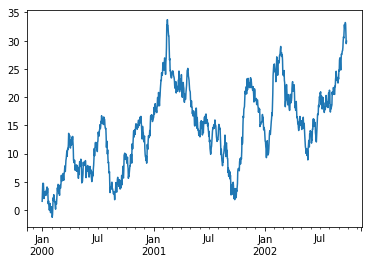

In [76]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

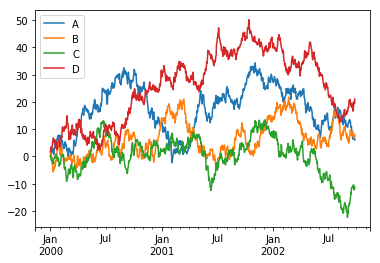

In [77]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Input / Output

In [81]:
# write to a csv file
df.to_csv('foo.csv', index=False)

In [83]:
# read file back in
path = 'foo.csv'
newDf = pd.read_csv(path)
newDf.head()

,A,B,C,D
0,0.209110,1.742979,0.314111,1.709560
1,-0.022789,0.360073,-0.476980,2.199903
2,0.770567,0.393464,-0.726788,3.469884
3,2.228278,-0.520604,-1.213440,2.862065
4,1.401799,-0.004366,-1.556029,2.381091


In [84]:
# remove the file
import os
os.remove(path)

In [85]:
# can also do Excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [86]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

,A,B,C,D
2000-01-01,0.209110,1.742979,0.314111,1.709560
2000-01-02,-0.022789,0.360073,-0.476980,2.199903
2000-01-03,0.770567,0.393464,-0.726788,3.469884
2000-01-04,2.228278,-0.520604,-1.213440,2.862065
2000-01-05,1.401799,-0.004366,-1.556029,2.381091


In [87]:
os.remove('foo.xlsx')